In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix



In [ ]:
diabetes_df = pd.read_csv('./data/Training.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


In [ ]:
diabetes_df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,0.491440,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,0.363917,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_df[diabetes_df.Glucose == diabetes_df.Glucose.min()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
645,5,0,80,32,0,41.0,0.346,37,1
935,5,0,80,32,0,41.0,0.346,37,1
950,1,0,74,20,23,27.7,0.299,21,0
973,1,0,68,35,0,32.0,0.389,22,0
1200,1,0,68,35,0,32.0,0.389,22,0
1511,1,0,68,35,0,32.0,0.389,22,0


In [ ]:
diabetes_df[diabetes_df.BloodPressure == diabetes_df.BloodPressure.min()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
...,...,...,...,...,...,...,...,...,...
2292,0,167,0,0,0,32.3,0.839,30,1
2375,2,119,0,0,0,19.6,0.832,72,0
2407,0,117,0,0,0,33.8,0.932,44,0
2412,7,105,0,0,0,0.0,0.305,24,0


In [ ]:
diabetes_df[diabetes_df.BMI == diabetes_df.BMI.min()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
484,0,94,0,0,0,0.0,0.256,25,0
526,8,125,96,0,0,0.0,0.232,54,1
614,0,118,64,23,89,0.0,1.731,21,0


In [ ]:
diabetes_df = diabetes_df[diabetes_df['Glucose'] >= 50]
diabetes_df = diabetes_df[diabetes_df['BloodPressure'] >= 40]
diabetes_df = diabetes_df[diabetes_df['BMI'] > 12]

In [ ]:
print(diabetes_df.shape)

(2299, 9)


In [ ]:
diabetes_df.drop(columns=['Pregnancies','Insulin','SkinThickness','DiabetesPedigreeFunction'], inplace=True)

In [ ]:
print(diabetes_df.head())

   Glucose  BloodPressure   BMI  Age  Outcome
0      148             72  33.6   50        1
1       85             66  26.6   31        0
2      183             64  23.3   32        1
3       89             66  28.1   21        0
4      137             40  43.1   33        1


In [ ]:
# Separate features (X) and target variable (y)
X = diabetes_df.drop(columns='Outcome')  # Features
y = diabetes_df['Outcome']  # Target (0 or 1, diabetes or not)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (important for neural networks)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Verify the shapes of the resulting datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1609, 4) (690, 4) (1609,) (690,)


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import time


In [ ]:
class CustomAccuracyCallback(tf.keras.callbacks.Callback):
    def __init__(self, min_train_accuracy=0.90, min_val_accuracy=0.75):
        super().__init__()
        self.min_train_accuracy = min_train_accuracy
        self.min_val_accuracy = min_val_accuracy

    def on_epoch_begin(self, epoch, logs=None):
        # Start timing the epoch
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        # Calculate epoch runtime
        epoch_runtime = time.time() - self.epoch_start_time
        logs['epoch_runtime'] = epoch_runtime  # Add runtime to logs

        # Retrieve accuracy metrics
        train_acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')

        # Print runtime and other metrics
        print(f"Epoch {epoch + 1} runtime: {epoch_runtime:.2f} seconds")

        # Check if both accuracy conditions are met
        if train_acc is not None and val_acc is not None and \
           train_acc >= self.min_train_accuracy and val_acc >= self.min_val_accuracy:
            print(f"\nEpoch {epoch + 1}: Stopping training as both conditions are met "
                  f"(train_acc >= {self.min_train_accuracy}, val_acc >= {self.min_val_accuracy}).")
            self.model.stop_training = True

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Create an instance of the CustomAccuracyCallback with the desired thresholds
accuracy_callback = CustomAccuracyCallback(min_train_accuracy=0.95, min_val_accuracy=0.90)

# Fit the model with the custom callback
history = model.fit(X_train, y_train,
                    epochs=200,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[accuracy_callback])

Epoch 1/200
35/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6661 - loss: 0.5835   Epoch 1 runtime: 1.16 seconds
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6706 - loss: 0.5787 - val_accuracy: 0.7578 - val_loss: 0.4856 - epoch_runtime: 1.1633
Epoch 2/200
37/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7346 - loss: 0.5096 Epoch 2 runtime: 0.13 seconds
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7337 - loss: 0.5101 - val_accuracy: 0.7578 - val_loss: 0.5133 - epoch_runtime: 0.1302
Epoch 3/200
35/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7546 - loss: 0.4878 Epoch 3 runtime: 0.14 seconds
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7523 - loss: 0.4907 - val_accuracy: 0.7360 - val_loss: 0.4680 - epoch_runtime: 0.1393
Epoch 4/200
35/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7378 - loss: 0.4869 Epoch 4 runtime: 0.13 seconds
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7384 - loss: 0.4858 - val_accuracy: 0.7981 - val_loss: 0.4583 - epoc

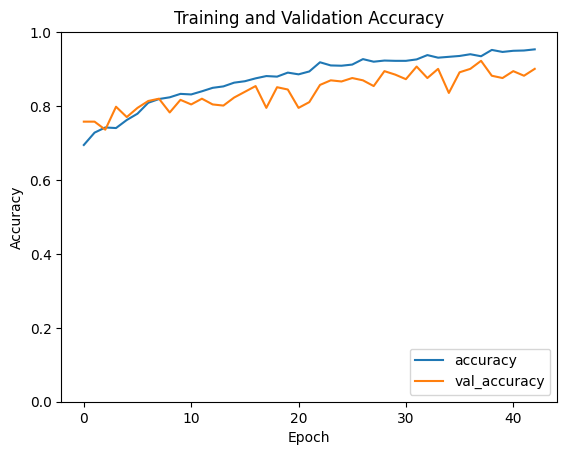

In [ ]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
# Predict the outcomes for the test set
predictions = model.predict(X_test)

# Convert predictions to binary values (0 or 1)
predictions = (predictions > 0.5).astype(int)

# Print some predictions
for i in range(10):
    print(f"Actual: {y_test.iloc[i]} Predicted: {predictions[i][0]}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Actual: 0 Predicted: 0
Actual: 0 Predicted: 0
Actual: 0 Predicted: 0
Actual: 1 Predicted: 1
Actual: 0 Predicted: 0
Actual: 0 Predicted: 0
Actual: 1 Predicted: 1
Actual: 0 Predicted: 0
Actual: 0 Predicted: 0
Actual: 1 Predicted: 0


In [ ]:
# Predict the probabilities for the test set
probabilities = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
predictions = (probabilities > 0.5).astype(int)

# Display predictions and probabilities where the actual value is 1
print("Predictions (with probabilities) where the actual value is 1:")
for i in range(len(y_test)):
    if y_test.iloc[i] == 1:  # Check if the actual value is 1
        print(f"Actual: {y_test.iloc[i]} Predicted: {predictions[i][0]} Probability: {probabilities[i][0]:.2%}")


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Predictions (with probabilities) where the actual value is 1:
Actual: 1 Predicted: 1 Probability: 100.00%
Actual: 1 Predicted: 1 Probability: 54.61%
Actual: 1 Predicted: 0 Probability: 47.39%
Actual: 1 Predicted: 1 Probability: 79.27%
Actual: 1 Predicted: 1 Probability: 53.38%
Actual: 1 Predicted: 1 Probability: 99.90%
Actual: 1 Predicted: 1 Probability: 99.97%
Actual: 1 Predicted: 0 Probability: 45.84%
Actual: 1 Predicted: 0 Probability: 47.39%
Actual: 1 Predicted: 0 Probability: 11.36%
Actual: 1 Predicted: 1 Probability: 86.39%
Actual: 1 Predicted: 1 Probability: 99.02%
Actual: 1 Predicted: 1 Probability: 52.10%
Actual: 1 Predicted: 1 Probability: 97.85%
Actual: 1 Predicted: 1 Probability: 99.94%
Actual: 1 Predicted: 1 Probability: 96.74%
Actual: 1 Predicted: 1 Probability: 95.47%
Actual: 1 Predicted: 1 Probability: 99.89%
Actual: 1 Predicted: 0 Probability: 0.96%
Actual: 1 Predicted: 1 Probability: 100.00%
Actual: 1 Predicted: 1 Probability: 8

In [ ]:
# Input data: feature values in the same order as the header
input_data = np.array([[100, 120, 20, 25]])

# Load or define the scaler used during training
# For example, if you used StandardScaler:

input_data = scaler.transform(input_data)  # Apply scaling to the input data

# Make the prediction
prediction = model.predict(input_data)

# Interpret the result
threshold = 0.5  # Default threshold for binary classification
print("Diabetes prediction:", "Positive" if prediction[0] >= threshold else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Diabetes prediction: Negative


In [ ]:
from tensorflow.keras.models import load_model

save_model = "/content/model_diabesafe.h5"
model = load_model(save_model)


In [ ]:
input_data = np.array([[180, 160, 30, 30]])
input_data = scaler.transform(input_data)  # Apply scaling to the input data
prediction = model.predict(input_data)

threshold = 0.5  # Default threshold for binary classification
print("Diabetes prediction:", "Positive" if prediction[0] >= threshold else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Diabetes prediction: Positive


In [ ]:
import json
# Save the mean and variance
scaler_params = {
    "mean": scaler.mean_.tolist(),
    "var": scaler.var_.tolist()
}

# Save parameters to a JSON file
with open("scaler_params.json", "w") as f:
    json.dump(scaler_params, f)